In [119]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs

import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")

print(f1.shape,f2.shape,f3.shape,f4.shape,f5.shape,f6.shape,f7.shape,f8.shape)
cap = pd.concat([f1,f2,f3,f4,f6,f7,f8,f5],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t6,t7,t8,t5],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)


from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection

rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

full.head()

(183, 18) (164, 18) (278, 18) (154, 18) (174, 18) (176, 18) (200, 18) (192, 18)
(1521, 44) (1521, 18) (1521, 26)


,1,2,3,4,5,6,7,8,9,10,...,Shoulder_L,Hip_R,Shoulder_R,Hip_u_L,Head,Hip_u_R,Head_u,Shoulder_pitch_L,Head_pitch,Shoulder_pitch_R
0,32.170,31.226,54.610,-12.289,37.270,-19.412,-15.922,-2.2978,-0.32138,-9.8953,...,-2196.000000,0,2243.000000,0,0,0,0,-254.000000,0,-631.000000
1,33.935,34.161,56.665,-12.488,39.463,-19.987,-17.261,-2.5077,-0.40396,-10.5590,...,-2196.736842,0,2240.684211,0,0,0,0,-240.421053,0,-597.947368
2,32.961,31.564,54.746,-11.809,36.489,-19.046,-16.506,-2.3873,-0.34868,-10.0670,...,-2197.473684,0,2238.368421,0,0,0,0,-226.842105,0,-564.894737
3,32.990,30.708,55.468,-11.346,35.372,-18.598,-16.070,-2.3202,-0.32733,-10.2220,...,-2198.210526,0,2236.052632,0,0,0,0,-213.263158,0,-531.842105
4,33.070,29.764,57.020,-10.839,34.338,-18.141,-15.418,-2.2212,-0.30061,-10.4740,...,-2198.947368,0,2233.736842,0,0,0,0,-199.684211,0,-498.789474


In [120]:
def load_data(location):
    dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],full[location]] , axis=1 )
    dataset.head()
    type(dataset)
    import matplotlib.pyplot as plt
    values = dataset.values
    # specify columns to plot
    #groups = [0, 1, 2, 3,4,5,6,7,8,9]
    #i=1
    #plt.figure(figsize=(18,12))
    #for group in groups:
    #    plt.subplot(len(groups), 1, i)
    #    plt.plot(values[:, group])
    #    plt.title(dataset.columns[group], y=0.5, loc='right')
     #   i += 1
    #plt.show()    
    values = dataset.values
    values = dataset.astype(np.float32)#inverse的关键一步。why？？
    n_features=9

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)


    train = scaled[:1347,:]
    val = scaled[1347:,:]



    train_X,train_y = train[:,:n_features],train[:,-1]
    val_X,val_y = val[:,:n_features],val[:,-1]#第一个多少行
    print(train_X.shape,train_y.shape)
    return train_X,train_y,val_X,val_y,val,scaler

In [47]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
def train_predict(train_X,train_y,val_X,val_y):
    print('============================predicting==============================')
    stack = StackingCVRegressor(regressors=(lasso,rf,xgb,ENet, KRR, lgb, gbm), 
                              meta_regressor=ENet)

    stack.fit(train_X, train_y)
    #sclf_pred = sclf.predict(X_train.values)
    stack_train_pred = stack.predict(train_X)
    stack_pred = stack.predict(val_X)
    print('mean_squared_error:')
    print(rmsle(train_y, stack_train_pred))
    return stack_pred

In [109]:
from numpy import concatenate

def inverse_data(stack_pred,val,val_y,scaler):
    res_pred = stack_pred.reshape(-1,1)
    inv_pred_con = concatenate((val[:,0:9],res_pred), axis=1)
    inv_pred = scaler.inverse_transform(inv_pred_con)
    inv_pred = inv_pred[:,-1] 


    res_y = val_y.reshape(-1,1)
    inv_y_con = concatenate(( val[:,0:9],res_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y_con)
    inv_y = inv_y[:,-1]
    plt.figure()
    plt.plot(inv_pred, label = 'predict')
    plt.plot(inv_y, label = 'true')
    plt.legend()
    plt.show()
    return inv_pred,inv_y


the 1 location
(1347, 9) (1347,)
============================predicting==============================
mean_squared_error:
0.011138938744111144


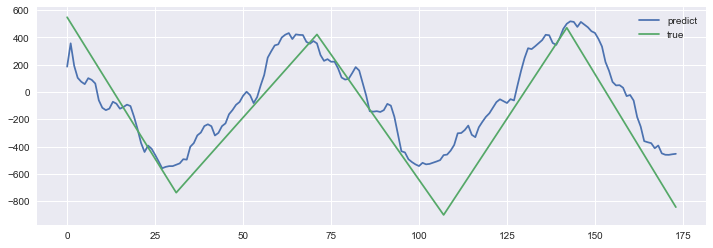

the 2 location
(1347, 9) (1347,)
============================predicting==============================
mean_squared_error:
0.01882917405192936


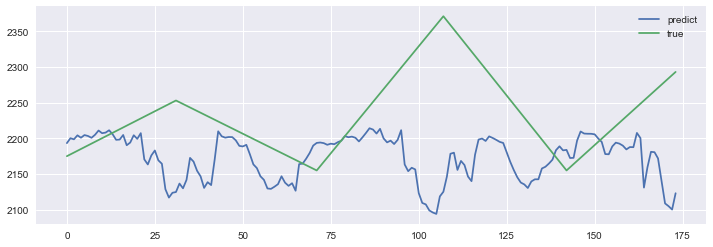

the 3 location
(1347, 9) (1347,)
============================predicting==============================
mean_squared_error:
0.019432343501464118


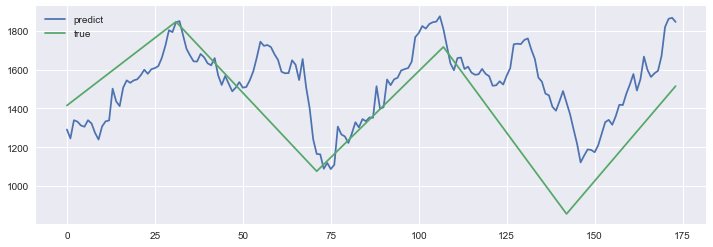

the 4 location
(1347, 9) (1347,)
============================predicting==============================
mean_squared_error:
0.030090132556224117


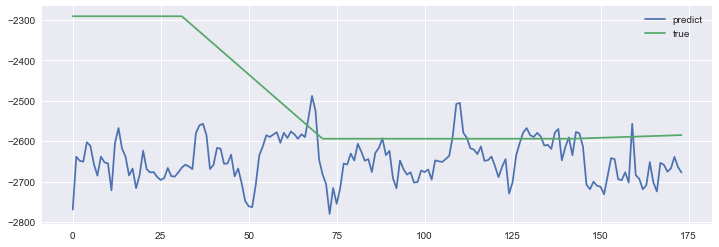

the 5 location
(1347, 9) (1347,)
============================predicting==============================
mean_squared_error:
0.03487609913367103


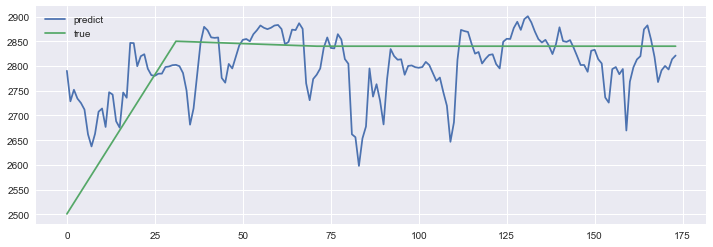

In [121]:
output=[]
t=1
for i in ['Shoulder_pitch_R','Shoulder_R','Elbow_R','Forearm_R','Hand_R']:
    location = i
    print('the %d location' % (t))
    t+=1
    train_X,train_y,val_X,val_y,val,scaler = load_data(location)
    stack_pred = train_predict(train_X,train_y,val_X,val_y)
    inv_pred,inv_y = inverse_data(stack_pred,val,val_y,scaler)
    output.append(inv_pred)

In [117]:
inv_y

array([2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.        , 2425.        ,
       2425.        , 2425.        , 2425.45239258, 2425.90478516,
       2426.35717773, 2426.80957031, 2427.26196289, 2427.71435547,
       2428.16674805, 2428.61914062, 2429.0715332 , 2429.52392578,
       2429.97607422, 2430.4284668 , 2430.88085938, 2431.33325195,
       2431.78564453, 2432.23803711, 2432.69042969, 2433.14282227,
       2433.59521484, 2434.04760742, 2434.5       , 2434.95239258,
       2435.40478516, 2435.85717773, 2436.30957031, 2436.76196

In [126]:
output_arr = np.array(output)

In [131]:
output_arr.transpose()

array([[ 1.85928679e+02,  2.19328810e+03,  1.29126788e+03,
        -2.76921944e+03,  2.79022763e+03],
       [ 3.56966351e+02,  2.20014706e+03,  1.24507847e+03,
        -2.63872159e+03,  2.72856720e+03],
       [ 1.92649371e+02,  2.19859638e+03,  1.33912957e+03,
        -2.64860321e+03,  2.75195889e+03],
       [ 1.04186182e+02,  2.20420528e+03,  1.33185405e+03,
        -2.65073666e+03,  2.73413734e+03],
       [ 7.58207442e+01,  2.20085844e+03,  1.31194535e+03,
        -2.60263618e+03,  2.72516992e+03],
       [ 5.80030218e+01,  2.20457453e+03,  1.30558021e+03,
        -2.61168995e+03,  2.71190747e+03],
       [ 1.01727807e+02,  2.20325904e+03,  1.33935557e+03,
        -2.65619782e+03,  2.66192640e+03],
       [ 8.90311960e+01,  2.20074063e+03,  1.32255446e+03,
        -2.68510622e+03,  2.63738076e+03],
       [ 6.25552645e+01,  2.20496251e+03,  1.27400288e+03,
        -2.63833643e+03,  2.66289956e+03],
       [-6.02006018e+01,  2.21091997e+03,  1.23950122e+03,
        -2.65225974e+03

In [135]:
##写入文件
pd_data = pd.DataFrame(output_arr,columns=['Shoulder_pitch_R','Shoulder_R','Elbow_R','Forearm_R','Hand_R'])
print(pd_data)
pd_data.to_csv('rob_data.csv')


ValueError: Shape of passed values is (174, 5), indices imply (5, 5)

In [136]:
output_arr.shape

(5, 174)

In [104]:
iny_y

NameError: name 'iny_y' is not defined